In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

<b>Data Prepocessing

In [2]:
df_churn=pd.read_csv('datasets%2F13996%2F18858%2FWA_Fn-UseC_-Telco-Customer-Churn.csv')
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df_churn['TotalCharges']=pd.to_numeric(df_churn.TotalCharges,errors='coerce')

In [5]:
df_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
df_churn.isnull().sum(axis=0)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df_churn.dropna(subset=['TotalCharges'],axis=0,inplace=True)

In [8]:
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
dum_churn=pd.get_dummies(df_churn['Churn'])

In [10]:
dum_churn

,No,Yes
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
7038,1,0
7039,1,0
7040,1,0
7041,0,1


In [11]:
dum_churn['Yes'].value_counts()

0    5163
1    1869
Name: Yes, dtype: int64

<b>Data Analysis

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80',]

In [13]:
dfchurn=df_churn[df_churn.Churn=='Yes'] 

In [14]:
dfnochurn=df_churn[df_churn.Churn=='No'] 

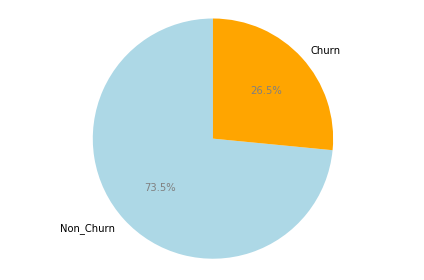

In [15]:
# Pie chart
#colors
colors = ['lightblue','orange']
sizes=[5174,1869]
labels=['Non_Churn','Churn']
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes,colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('grey')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
plt.tight_layout()
plt.show()

## <b>1.1-How much is churn affecting the business?

In [16]:
print('Total charges 0')

Total charges 0


In [17]:
df_relation=df_churn[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']]

In [18]:
df_churn.groupby(['gender','Churn']).count()

customerID  SeniorCitizen  Partner  Dependents  tenure  \
gender Churn                                                           
Female No           2544           2544     2544        2544    2544   
       Yes           939            939      939         939     939   
Male   No           2619           2619     2619        2619    2619   
       Yes           930            930      930         930     930   

              PhoneService  MultipleLines  InternetService  OnlineSecurity  \
gender Churn                                                                 
Female No             2544           2544             2544            2544   
       Yes             939            939              939             939   
Male   No             2619           2619             2619            2619   
       Yes             930            930              930             930   

              OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
gender Churn                                                             
Female No             2544              2544         2544         2544   
       Yes             939               939          939          939   
Male   No             2619              2619         2619         2619   
       Yes             930               930          930          930   

              StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
gender Churn                                                               
Female No                2544      2544              2544           2544   
       Yes                939       939               939            939   
Male   No                2619      2619              2619           2619   
       Yes                930       930               930            930   

              MonthlyCharges  TotalCharges  
gender Churn                                
Female No               2544          2544  
       Yes               939           939  
Male   No               2619          2619  
       Yes               930           930

<b>gender

In [19]:
dum_churn.rename(columns={'No':'No_churn','Yes':'churn'},inplace=True)
dfb=pd.concat([dum_churn,df_relation],axis=1)
#dfb.drop('Churn')

In [20]:
dfb.groupby(['gender'])['churn'].sum()

gender
Female    939.0
Male      930.0
Name: churn, dtype: float64

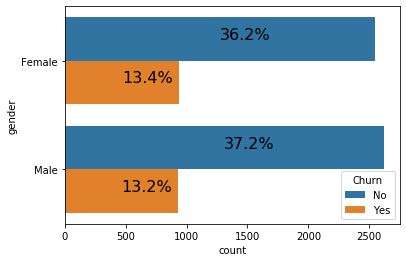

In [115]:
ax = sns.countplot(y="gender", hue="Churn", data=df_churn)
total = len(df_churn["gender"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")


In [22]:
anova_gender=dfchurn[['gender','Churn']]
ggrp=anova_gender.groupby(['gender']).size()
print('Client churn by gender')
ggrp

Client churn by gender


gender
Female    939
Male      930
dtype: int64

<b>Senior Citizen

In [23]:
df_grp=df_relation.groupby(['gender','Churn'],as_index=False).sum()
df_pivotg=df_grp.pivot(index='gender',columns='Churn')
df_pivotg

SeniorCitizen     
Churn             No  Yes
gender                   
Female           328  240
Male             338  236

In [24]:
anova_sc=dfchurn[['SeniorCitizen','Churn']]
scgrp=anova_sc.groupby(['SeniorCitizen']).size()
print('Client churn by SeniorCitizen')
scgrp

Client churn by SeniorCitizen


SeniorCitizen
0    1393
1     476
dtype: int64

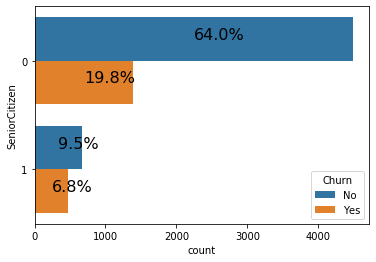

In [114]:
ax = sns.countplot(y="SeniorCitizen", hue="Churn", data=df_churn)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

<b>Partner

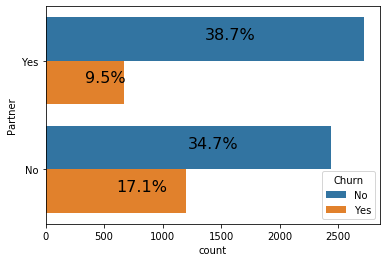

In [113]:
ax = sns.countplot(y="Partner", hue="Churn", data=df_churn)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

In [27]:
anova_partner=dfchurn[['Partner','Churn']]
pgrp=anova_partner.groupby(['Partner']).size()
print('Client churn by partner')
pgrp

Client churn by partner


Partner
No     1200
Yes     669
dtype: int64

<b>Dependents

In [28]:
anova_Dependents=dfchurn[['Dependents','Churn']]
dgrp=anova_Dependents.groupby(['Dependents']).size()
print('Client churn by Dependents')
dgrp

Client churn by Dependents


Dependents
No     1543
Yes     326
dtype: int64

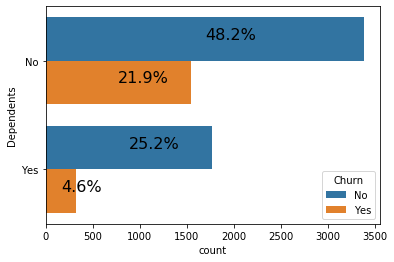

In [29]:
ax = sns.countplot(y="Dependents", hue="Churn", data=df_churn)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

<b>Phone Service

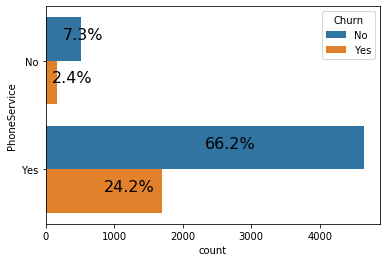

In [30]:
ax = sns.countplot(y="PhoneService", hue="Churn", data=df_churn)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

<b>MultipleLines

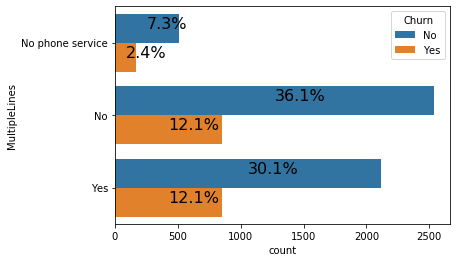

In [31]:
ax = sns.countplot(y="MultipleLines", hue="Churn", data=df_churn)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

<b>InternetService

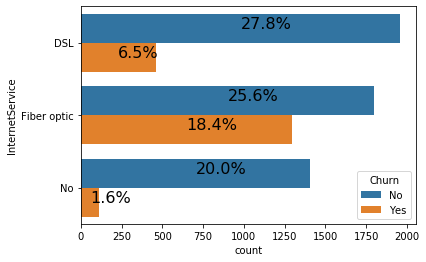

In [32]:
ax = sns.countplot(y="InternetService", hue="Churn", data=df_churn)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

<b>OnlineSecurity

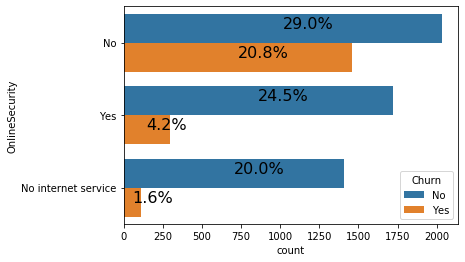

In [33]:
ax = sns.countplot(y="OnlineSecurity", hue="Churn", data=df_churn)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

<b>OnlineBackup

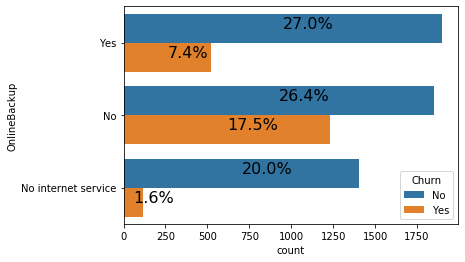

In [34]:
ax = sns.countplot(y="OnlineBackup", hue="Churn", data=df_churn)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

<b>DeviceProtection

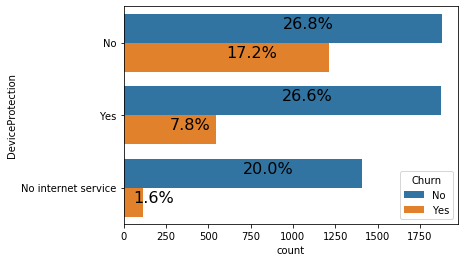

In [35]:
ax = sns.countplot(y="DeviceProtection", hue="Churn", data=df_churn)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

<b>TechSupport

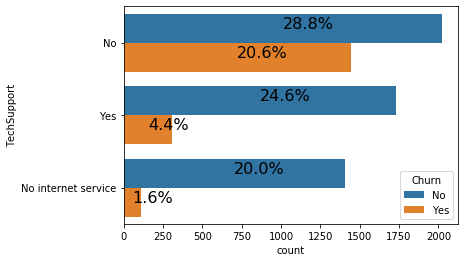

In [36]:
ax = sns.countplot(y="TechSupport", hue="Churn", data=df_churn)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

<b>StreamingTV

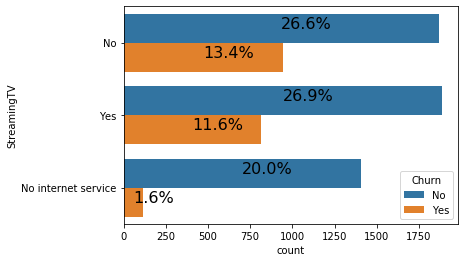

In [37]:
ax = sns.countplot(y="StreamingTV", hue="Churn", data=df_churn)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

<b>StreamingMovies

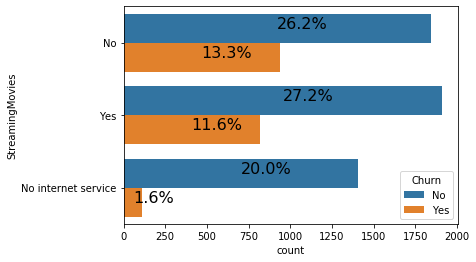

In [38]:
ax = sns.countplot(y="StreamingMovies", hue="Churn", data=df_churn)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

<b>Contract

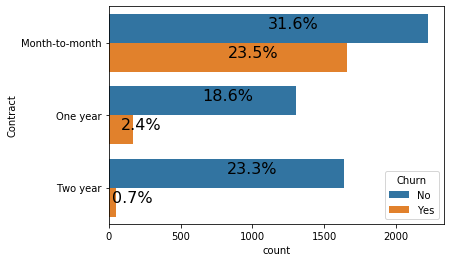

In [39]:
ax = sns.countplot(y="Contract", hue="Churn", data=df_churn)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

<b>PaperlessBilling

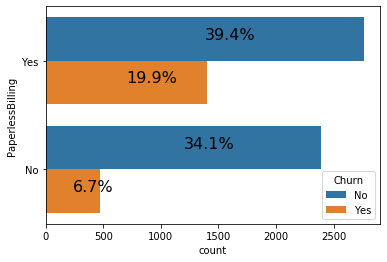

In [40]:
ax = sns.countplot(y="PaperlessBilling", hue="Churn", data=df_churn)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

<b>PaymentMethod

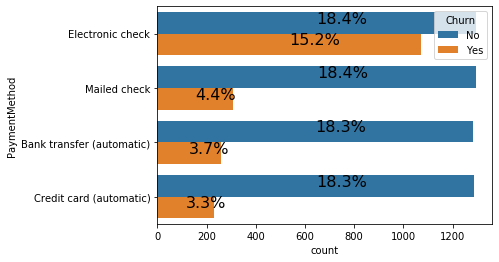

In [41]:
ax = sns.countplot(y="PaymentMethod", hue="Churn", data=df_churn)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

<b>tenure

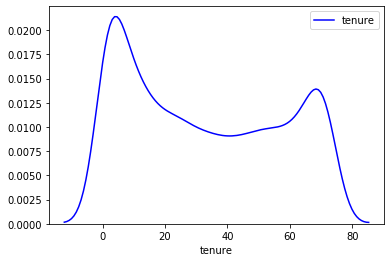

In [42]:
#ax1=sns.distplot(df_churn['Churn'],hist=False,color='r',label='Churn')
sns.distplot(df_churn['tenure'],hist=False,color='b',label='tenure')

In [43]:
df_churn['tenure'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

Text(0.5, 1.0, 'tenure distribution by Churn')

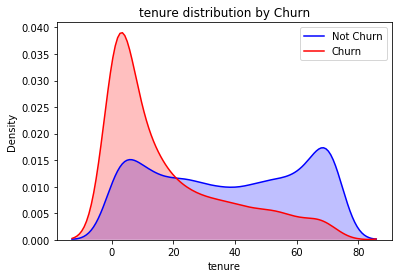

In [44]:
ax = sns.kdeplot(df_churn.tenure[(df_churn["Churn"] == 'No') ],
                color="Blue", shade = True)
ax = sns.kdeplot(df_churn.tenure[(df_churn["Churn"] == 'Yes') ],
                ax =ax, color="Red", shade= True)
ax.legend(["Not Churn","Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('tenure')
ax.set_title('tenure distribution by Churn')

<b>Monthly Charges

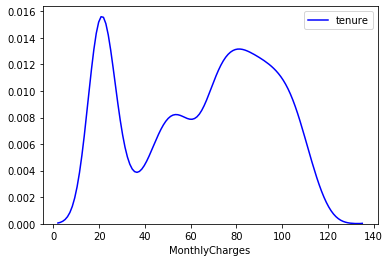

In [45]:
sns.distplot(df_churn['MonthlyCharges'],hist=False,color='b',label='tenure')

In [46]:
df_churn['MonthlyCharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [47]:
print('Monthly Charges for churner')
dfchurn['MonthlyCharges'].describe()

Monthly Charges for churner


count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

Text(0.5, 1.0, 'Monthly distribution by Churn')

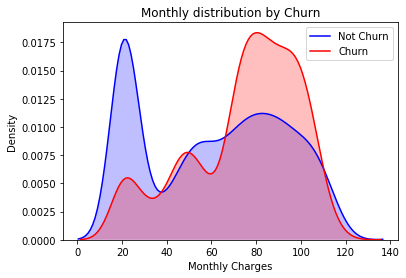

In [48]:
ax = sns.kdeplot(df_churn.MonthlyCharges[(df_churn["Churn"] == 'No') ],
                color="Blue", shade = True)
ax = sns.kdeplot(df_churn.MonthlyCharges[(df_churn["Churn"] == 'Yes') ],
                ax =ax, color="Red", shade= True)
ax.legend(["Not Churn","Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Monthly distribution by Churn')

In [49]:
print('Monthly Charges for no_churner')
dfnochurn['MonthlyCharges'].describe()

Monthly Charges for no_churner


count    5163.000000
mean       61.307408
std        31.094557
min        18.250000
25%        25.100000
50%        64.450000
75%        88.475000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [50]:
dfmonthly=df_churn[['MonthlyCharges','Churn']]
monthlygroup=dfmonthly.groupby(['Churn']).MonthlyCharges.sum().to_frame()/ dfmonthly.MonthlyCharges.sum()
np.round(100*monthlygroup,2)

,MonthlyCharges
Churn,
No,69.47
Yes,30.53


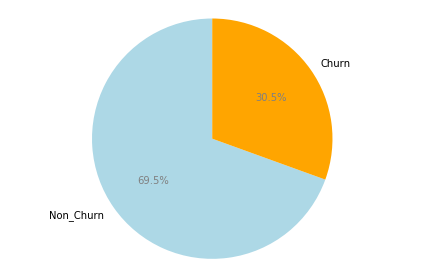

In [51]:
colors = ['lightblue','orange']
sizes=[69.47,30.53]
labels=['Non_Churn','Churn']
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes,colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('grey')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
plt.tight_layout()
plt.show()

<b>TotalCharges

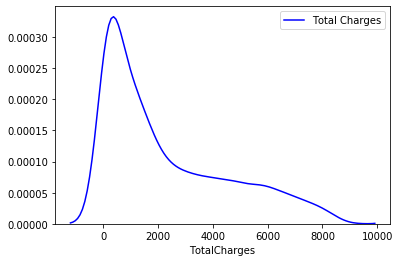

In [52]:
sns.distplot(df_churn['TotalCharges'],hist=False,color='b',label='Total Charges')

In [53]:
df_churn['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [54]:
print('Total Charges for churner')
dfchurn['TotalCharges'].describe()

Total Charges for churner


count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: TotalCharges, dtype: float64

In [55]:
print('Total Charges for no_churner')
dfnochurn['TotalCharges'].describe()

Total Charges for no_churner


count    5163.000000
mean     2555.344141
std      2329.456984
min        18.800000
25%       577.825000
50%      1683.600000
75%      4264.125000
max      8672.450000
Name: TotalCharges, dtype: float64

In [56]:
dftotal=df_churn[['TotalCharges','Churn']]
totalgroup=dftotal.groupby(['Churn']).TotalCharges.sum().to_frame()/ dftotal.TotalCharges.sum()
np.round(100*totalgroup,2)

,TotalCharges
Churn,
No,82.17
Yes,17.83


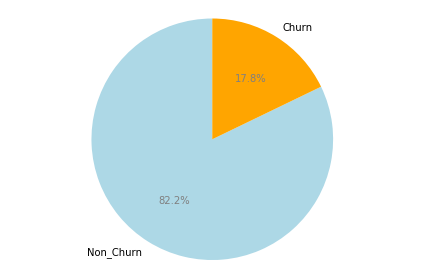

In [57]:
colors = ['lightblue','orange']
sizes=[82.17,17.83]
labels=['Non_Churn','Churn']
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes,colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('grey')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Total Charges distribution by Churn')

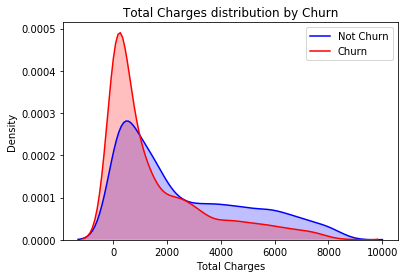

In [58]:
ax = sns.kdeplot(df_churn.TotalCharges[(df_churn["Churn"] == 'No') ],
                color="Blue", shade = True)
ax = sns.kdeplot(df_churn.TotalCharges[(df_churn["Churn"] == 'Yes') ],
                ax =ax, color="Red", shade= True)
ax.legend(["Not Churn","Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Total Charges distribution by Churn')

<b>Services

In [59]:
#anova_partner=dfchurn[['Partner','Churn']]
df_churn.columns
#pgrp=dfchurn.groupby([]).size()
#rint('Client churn by')
#pgrp

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [60]:
#values = dfchurn.columns[6:15]
#df0=dfchurn['Churn']
#values.union(df0)

In [61]:
#grouped = values.groupby(['cut','']).size()

In [62]:
#values = df_churn.columns[6:15].to_list()
#pgrp = list()

#for i in values:
    #anova_partner=dfchurn[[i,'Churn']]
    #pgrp=anova_partner.groupby([i]).size()
    #pgrp
    #print('Client churn by '+i)
    
#pgrp



In [63]:


#plt.title("InternetService", fontsize=10)
#plt.ylabel('Churn')
#plt.xlabel('InternetService')
#plt.show()


#df.groupby(['InternetService','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

In [64]:
#plt.hist(df['InternetService'])

 ## <b>Model

In [65]:
dfm=df_churn.drop('customerID',axis=1,inplace=True)

In [66]:
df_churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
listt0=df_churn.columns.to_list()
list1=[]
list2=[]
for d in listt0 :
    if df_churn[d].dtypes == 'object':
        list1.append(d)
    else :
        list2.append(d)
print(list1,list2)    

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [69]:
df1=df_churn[list1]
dfcat_num=df1.apply(LabelEncoder().fit_transform)
dfcat_num.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [70]:
dfnum=df_churn[list2]
dfnum.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [71]:
df_model=pd.concat([dfcat_num,dfnum],axis=1)
df_model.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0,1,29.85,29.85
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0,34,56.95,1889.50
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0,2,53.85,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0,2,70.70,151.65


In [72]:
df_model.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen', 'tenure',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [73]:
y=df_model['Churn']
x=df_model[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'tenure',
       'MonthlyCharges', 'TotalCharges']]

In [74]:
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression

In [75]:
import statsmodels.api as sm

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [78]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.416779
         Iterations 8
                         Results: Logit
Model:               Logit            Pseudo R-squared: 0.280    
Dependent Variable:  Churn            AIC:              5899.5758
Date:                2020-06-23 16:10 BIC:              6029.8821
No. Observations:    7032             Log-Likelihood:   -2930.8  
Df Model:            18               LL-Null:          -4071.7  
Df Residuals:        7013             LLR p-value:      0.0000   
Converged:           1.0000           Scale:            1.0000   
No. Iterations:      8.0000                                      
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
gender           -0.0574   0.0635  -0.9041 0.3660 -0.1817  0.0670
Partner           0.0095   0.0773   0.1230 0.9021 -0.1420  0.1610


In [79]:
 #The p-values for most of the variables are smaller than 0.05, except for variables: gender,Partner,MultipleLines,StreamingTV,StreamingMovies,PaymentMethod. Therefore, we will remove them.
list4=['Dependents','PhoneService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','PaperlessBilling','SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
x1=x[list4]
logit_model1=sm.Logit(y,x1)
result1=logit_model1.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.417004
         Iterations 8
                         Results: Logit
Model:               Logit            Pseudo R-squared: 0.280    
Dependent Variable:  Churn            AIC:              5890.7377
Date:                2020-06-23 16:10 BIC:              5979.8946
No. Observations:    7032             Log-Likelihood:   -2932.4  
Df Model:            12               LL-Null:          -4071.7  
Df Residuals:        7019             LLR p-value:      0.0000   
Converged:           1.0000           Scale:            1.0000   
No. Iterations:      8.0000                                      
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Dependents       -0.1752   0.0808  -2.1699 0.0300 -0.3335 -0.0170
PhoneService     -1.2084   0.1262  -9.5724 0.0000 -1.4558 -0.9610


In [80]:
#now the p-value is smaller than .05
# we will fit the logestic regression
from sklearn import metrics
from sklearn.model_selection import train_test_split
x1_train, x1_test, y_train, y_test = train_test_split(x1, y , test_size=0.3, random_state=0)

In [81]:
logistic_regression= LogisticRegression()
logistic_regression.fit(x1_train,y_train)
y_pred=logistic_regression.predict(x1_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [82]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic_regression.score(x1_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1375  180]
 [ 248  307]]


In [84]:
#The result is telling us that we have 1375+307 correct predictions and 248+180 incorrect predictions.

In [85]:
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1555
           1       0.63      0.55      0.59       555

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



## <b>Profil

In [86]:
list30=x1_train.columns.to_list()
dfch=df_churn[list30]

In [87]:
dummies=pd.get_dummies(dfch[['Dependents','PhoneService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','PaperlessBilling']])


In [88]:
dfa=df_churn[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Churn','gender']]
dataprofil = pd.concat([dummies,dfa], axis = 1)

In [89]:
list50=dataprofil.columns.to_list()
list50

['Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'gender']

In [90]:
grpprofil = dataprofil[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','gender','TechSupport_No','Contract_Month-to-month','DeviceProtection_No','OnlineSecurity_No','Churn']].groupby(['Churn']).size()
grpprofil

Churn
No     5163
Yes    1869
dtype: int64

In [91]:
a=dataprofil.groupby(['gender','Churn']).sum()
a

Dependents_No  Dependents_Yes  PhoneService_No  \
gender Churn                                                   
Female No            1686.0           858.0            249.0   
       Yes            774.0           165.0             80.0   
Male   No            1704.0           915.0            261.0   
       Yes            769.0           161.0             90.0   

              PhoneService_Yes  InternetService_DSL  \
gender Churn                                          
Female No               2295.0                965.0   
       Yes               859.0                219.0   
Male   No               2358.0                992.0   
       Yes               840.0                240.0   

              InternetService_Fiber optic  InternetService_No  \
gender Churn                                                    
Female No                           889.0               690.0   
       Yes                          664.0                56.0   
Male   No                           910.0               717.0   
       Yes                          633.0                57.0   

              OnlineSecurity_No  OnlineSecurity_No internet service  \
gender Churn                                                          
Female No                 992.0                               690.0   
       Yes                721.0                                56.0   
Male   No                1044.0                               717.0   
       Yes                740.0                                57.0   

              OnlineSecurity_Yes  ...  TechSupport_Yes  \
gender Churn                      ...                    
Female No                  862.0  ...            859.0   
       Yes                 162.0  ...            165.0   
Male   No                  858.0  ...            871.0   
       Yes                 133.0  ...            145.0   

              Contract_Month-to-month  Contract_One year  Contract_Two year  \
gender Churn                                                                  
Female No                      1083.0              643.0              818.0   
       Yes                      842.0               75.0               22.0   
Male   No                      1137.0              663.0              819.0   
       Yes                      813.0               91.0               26.0   

              PaperlessBilling_No  PaperlessBilling_Yes  SeniorCitizen  \
gender Churn                                                             
Female No                  1158.0                1386.0            328   
       Yes                  240.0                 699.0            240   
Male   No                  1237.0                1382.0            338   
       Yes                  229.0                 701.0            236   

              tenure  MonthlyCharges  TotalCharges  
gender Churn                                        
Female No      96502       156901.05    6599274.45  
       Yes     15967        70248.55    1353079.75  
Male   No      97885       159629.10    6593967.35  
       Yes     17636        68882.30    1509847.15  

[4 rows x 28 columns]

In [92]:
dfp=a.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1,inplace=False)
dfp

Dependents_No  Dependents_Yes  PhoneService_No  \
gender Churn                                                   
Female No            1686.0           858.0            249.0   
       Yes            774.0           165.0             80.0   
Male   No            1704.0           915.0            261.0   
       Yes            769.0           161.0             90.0   

              PhoneService_Yes  InternetService_DSL  \
gender Churn                                          
Female No               2295.0                965.0   
       Yes               859.0                219.0   
Male   No               2358.0                992.0   
       Yes               840.0                240.0   

              InternetService_Fiber optic  InternetService_No  \
gender Churn                                                    
Female No                           889.0               690.0   
       Yes                          664.0                56.0   
Male   No                           910.0               717.0   
       Yes                          633.0                57.0   

              OnlineSecurity_No  OnlineSecurity_No internet service  \
gender Churn                                                          
Female No                 992.0                               690.0   
       Yes                721.0                                56.0   
Male   No                1044.0                               717.0   
       Yes                740.0                                57.0   

              OnlineSecurity_Yes  ...  DeviceProtection_Yes  TechSupport_No  \
gender Churn                      ...                                         
Female No                  862.0  ...                 932.0           995.0   
       Yes                 162.0  ...                 267.0           718.0   
Male   No                  858.0  ...                 941.0          1031.0   
       Yes                 133.0  ...                 278.0           728.0   

              TechSupport_No internet service  TechSupport_Yes  \
gender Churn                                                     
Female No                               690.0            859.0   
       Yes                               56.0            165.0   
Male   No                               717.0            871.0   
       Yes                               57.0            145.0   

              Contract_Month-to-month  Contract_One year  Contract_Two year  \
gender Churn                                                                  
Female No                      1083.0              643.0              818.0   
       Yes                      842.0               75.0               22.0   
Male   No                      1137.0              663.0              819.0   
       Yes                      813.0               91.0               26.0   

              PaperlessBilling_No  PaperlessBilling_Yes  SeniorCitizen  
gender Churn                                                            
Female No                  1158.0                1386.0            328  
       Yes                  240.0                 699.0            240  
Male   No                  1237.0                1382.0            338  
       Yes                  229.0                 701.0            236  

[4 rows x 25 columns]

In [93]:
b=dataprofil.groupby(['gender','Churn']).mean()
b

Dependents_No  Dependents_Yes  PhoneService_No  \
gender Churn                                                   
Female No          0.662736        0.337264         0.097877   
       Yes         0.824281        0.175719         0.085197   
Male   No          0.650630        0.349370         0.099656   
       Yes         0.826882        0.173118         0.096774   

              PhoneService_Yes  InternetService_DSL  \
gender Churn                                          
Female No             0.902123             0.379324   
       Yes            0.914803             0.233227   
Male   No             0.900344             0.378771   
       Yes            0.903226             0.258065   

              InternetService_Fiber optic  InternetService_No  \
gender Churn                                                    
Female No                        0.349450            0.271226   
       Yes                       0.707135            0.059638   
Male   No                        0.347461            0.273769   
       Yes                       0.680645            0.061290   

              OnlineSecurity_No  OnlineSecurity_No internet service  \
gender Churn                                                          
Female No              0.389937                            0.271226   
       Yes             0.767838                            0.059638   
Male   No              0.398625                            0.273769   
       Yes             0.795699                            0.061290   

              OnlineSecurity_Yes  ...  TechSupport_Yes  \
gender Churn                      ...                    
Female No               0.338836  ...         0.337657   
       Yes              0.172524  ...         0.175719   
Male   No               0.327606  ...         0.332570   
       Yes              0.143011  ...         0.155914   

              Contract_Month-to-month  Contract_One year  Contract_Two year  \
gender Churn                                                                  
Female No                    0.425708           0.252752           0.321541   
       Yes                   0.896699           0.079872           0.023429   
Male   No                    0.434135           0.253150           0.312715   
       Yes                   0.874194           0.097849           0.027957   

              PaperlessBilling_No  PaperlessBilling_Yes  SeniorCitizen  \
gender Churn                                                             
Female No                0.455189              0.544811       0.128931   
       Yes               0.255591              0.744409       0.255591   
Male   No                0.472318              0.527682       0.129057   
       Yes               0.246237              0.753763       0.253763   

                 tenure  MonthlyCharges  TotalCharges  
gender Churn                                           
Female No     37.933176       61.674941   2594.054422  
       Yes    17.004260       74.812087   1440.979499  
Male   No     37.374952       60.950401   2517.742402  
       Yes    18.963441       74.066989   1623.491559  

[4 rows x 28 columns]

In [94]:
dfp1=b.drop(['Dependents_No','Dependents_Yes','PhoneService_No','PhoneService_Yes','InternetService_DSL','InternetService_Fiber optic','InternetService_No','OnlineSecurity_No','OnlineSecurity_No internet service','OnlineSecurity_Yes', 'OnlineBackup_No','OnlineBackup_No internet service','OnlineBackup_Yes','DeviceProtection_No','DeviceProtection_No internet service','DeviceProtection_Yes','TechSupport_No','TechSupport_No internet service','TechSupport_Yes','Contract_Month-to-month','Contract_One year','Contract_Two year','PaperlessBilling_No','PaperlessBilling_Yes','SeniorCitizen'],axis=1,inplace=False)

In [95]:
dfp1

tenure  MonthlyCharges  TotalCharges
gender Churn                                         
Female No     37.933176       61.674941   2594.054422
       Yes    17.004260       74.812087   1440.979499
Male   No     37.374952       60.950401   2517.742402
       Yes    18.963441       74.066989   1623.491559

In [96]:
dfprofil = pd.concat([dfp,dfp1], axis = 1)
dfprofil

Dependents_No  Dependents_Yes  PhoneService_No  \
gender Churn                                                   
Female No            1686.0           858.0            249.0   
       Yes            774.0           165.0             80.0   
Male   No            1704.0           915.0            261.0   
       Yes            769.0           161.0             90.0   

              PhoneService_Yes  InternetService_DSL  \
gender Churn                                          
Female No               2295.0                965.0   
       Yes               859.0                219.0   
Male   No               2358.0                992.0   
       Yes               840.0                240.0   

              InternetService_Fiber optic  InternetService_No  \
gender Churn                                                    
Female No                           889.0               690.0   
       Yes                          664.0                56.0   
Male   No                           910.0               717.0   
       Yes                          633.0                57.0   

              OnlineSecurity_No  OnlineSecurity_No internet service  \
gender Churn                                                          
Female No                 992.0                               690.0   
       Yes                721.0                                56.0   
Male   No                1044.0                               717.0   
       Yes                740.0                                57.0   

              OnlineSecurity_Yes  ...  TechSupport_Yes  \
gender Churn                      ...                    
Female No                  862.0  ...            859.0   
       Yes                 162.0  ...            165.0   
Male   No                  858.0  ...            871.0   
       Yes                 133.0  ...            145.0   

              Contract_Month-to-month  Contract_One year  Contract_Two year  \
gender Churn                                                                  
Female No                      1083.0              643.0              818.0   
       Yes                      842.0               75.0               22.0   
Male   No                      1137.0              663.0              819.0   
       Yes                      813.0               91.0               26.0   

              PaperlessBilling_No  PaperlessBilling_Yes  SeniorCitizen  \
gender Churn                                                             
Female No                  1158.0                1386.0            328   
       Yes                  240.0                 699.0            240   
Male   No                  1237.0                1382.0            338   
       Yes                  229.0                 701.0            236   

                 tenure  MonthlyCharges  TotalCharges  
gender Churn                                           
Female No     37.933176       61.674941   2594.054422  
       Yes    17.004260       74.812087   1440.979499  
Male   No     37.374952       60.950401   2517.742402  
       Yes    18.963441       74.066989   1623.491559  

[4 rows x 28 columns]

In [97]:
from sklearn import preprocessing 
values = preprocessing.normalize(dfprofil)
dfprofil[['Dependents_No','Dependents_Yes','PhoneService_No','PhoneService_Yes','InternetService_DSL','InternetService_Fiber optic','InternetService_No','OnlineSecurity_No','OnlineSecurity_No internet service','OnlineSecurity_Yes', 'OnlineBackup_No','OnlineBackup_No internet service','OnlineBackup_Yes','DeviceProtection_No','DeviceProtection_No internet service','DeviceProtection_Yes','TechSupport_No','TechSupport_No internet service','TechSupport_Yes','Contract_Month-to-month','Contract_One year','Contract_Two year','PaperlessBilling_No','PaperlessBilling_Yes','SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]=values

In [98]:
dfprofil

Dependents_No  Dependents_Yes  PhoneService_No  \
gender Churn                                                   
Female No          0.296826        0.151054         0.043837   
       Yes         0.287100        0.061203         0.029674   
Male   No          0.295205        0.158517         0.045216   
       Yes         0.276968        0.057987         0.032415   

              PhoneService_Yes  InternetService_DSL  \
gender Churn                                          
Female No             0.404042             0.169891   
       Yes            0.318629             0.081234   
Male   No             0.408506             0.171857   
       Yes            0.302539             0.086440   

              InternetService_Fiber optic  InternetService_No  \
gender Churn                                                    
Female No                        0.156511            0.121477   
       Yes                       0.246297            0.020772   
Male   No                        0.157651            0.124215   
       Yes                       0.227985            0.020529   

              OnlineSecurity_No  OnlineSecurity_No internet service  \
gender Churn                                                          
Female No              0.174645                            0.121477   
       Yes             0.267440                            0.020772   
Male   No              0.180865                            0.124215   
       Yes             0.266523                            0.020529   

              OnlineSecurity_Yes  ...  TechSupport_Yes  \
gender Churn                      ...                    
Female No               0.151758  ...         0.151230   
       Yes              0.060091  ...         0.061203   
Male   No               0.148642  ...         0.150894   
       Yes              0.047902  ...         0.052224   

              Contract_Month-to-month  Contract_One year  Contract_Two year  \
gender Churn                                                                  
Female No                    0.190666           0.113202           0.144012   
       Yes                   0.312323           0.027820           0.008160   
Male   No                    0.196977           0.114860           0.141886   
       Yes                   0.292815           0.032775           0.009364   

              PaperlessBilling_No  PaperlessBilling_Yes  SeniorCitizen  \
gender Churn                                                             
Female No                0.203870              0.244010       0.057745   
       Yes               0.089023              0.259280       0.089023   
Male   No                0.214301              0.239421       0.058556   
       Yes               0.082478              0.252476       0.084999   

                tenure  MonthlyCharges  TotalCharges  
gender Churn                                          
Female No     0.006678        0.010858      0.456692  
       Yes    0.006307        0.027750      0.534502  
Male   No     0.006475        0.010559      0.436180  
       Yes    0.006830        0.026676      0.584726  

[4 rows x 28 columns]

In [99]:
dfreset=dfprofil.reset_index()
dfreset['plot']=dfreset['gender']+dfreset['Churn']
dfreset

,gender,Churn,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,plot
0,Female,No,0.296826,0.151054,0.043837,0.404042,0.169891,0.156511,0.121477,0.174645,...,0.190666,0.113202,0.144012,0.203870,0.244010,0.057745,0.006678,0.010858,0.456692,FemaleNo
1,Female,Yes,0.287100,0.061203,0.029674,0.318629,0.081234,0.246297,0.020772,0.267440,...,0.312323,0.027820,0.008160,0.089023,0.259280,0.089023,0.006307,0.027750,0.534502,FemaleYes
2,Male,No,0.295205,0.158517,0.045216,0.408506,0.171857,0.157651,0.124215,0.180865,...,0.196977,0.114860,0.141886,0.214301,0.239421,0.058556,0.006475,0.010559,0.436180,MaleNo
3,Male,Yes,0.276968,0.057987,0.032415,0.302539,0.086440,0.227985,0.020529,0.266523,...,0.292815,0.032775,0.009364,0.082478,0.252476,0.084999,0.006830,0.026676,0.584726,MaleYes


In [100]:
dfreset12=dfreset.drop(['gender','Churn'],axis=1,inplace=False)
dfreset12

,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,plot
0,0.296826,0.151054,0.043837,0.404042,0.169891,0.156511,0.121477,0.174645,0.121477,0.151758,...,0.190666,0.113202,0.144012,0.203870,0.244010,0.057745,0.006678,0.010858,0.456692,FemaleNo
1,0.287100,0.061203,0.029674,0.318629,0.081234,0.246297,0.020772,0.267440,0.020772,0.060091,...,0.312323,0.027820,0.008160,0.089023,0.259280,0.089023,0.006307,0.027750,0.534502,FemaleYes
2,0.295205,0.158517,0.045216,0.408506,0.171857,0.157651,0.124215,0.180865,0.124215,0.148642,...,0.196977,0.114860,0.141886,0.214301,0.239421,0.058556,0.006475,0.010559,0.436180,MaleNo
3,0.276968,0.057987,0.032415,0.302539,0.086440,0.227985,0.020529,0.266523,0.020529,0.047902,...,0.292815,0.032775,0.009364,0.082478,0.252476,0.084999,0.006830,0.026676,0.584726,MaleYes


In [101]:
#dfreset1.columns

In [102]:
dfreset13=dfreset12[['Dependents_No', 'Dependents_Yes', 'PhoneService_No','PhoneService_Yes', 'InternetService_DSL','InternetService_Fiber optic', 'InternetService_No','OnlineSecurity_No', 'OnlineSecurity_No internet service','OnlineSecurity_Yes', 'OnlineBackup_No','OnlineBackup_No internet service', 'OnlineBackup_Yes','DeviceProtection_No', 'DeviceProtection_No internet service','DeviceProtection_Yes', 'TechSupport_No','TechSupport_No internet service', 'TechSupport_Yes','Contract_Month-to-month', 'Contract_One year', 'Contract_Two year','PaperlessBilling_No', 'PaperlessBilling_Yes', 'SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']]*100

In [103]:
dfreset14=dfreset12['plot']

In [104]:
dfreset1=pd.concat([dfreset14,dfreset13], axis = 1)

In [105]:
dfreset1

,plot,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,...,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,FemaleNo,29.682592,15.105376,4.383728,40.404240,16.989147,15.651141,12.147680,17.464491,12.147680,...,15.122981,19.066576,11.320229,14.401163,20.386976,24.400992,5.774549,0.667826,1.085808,45.669193
1,FemaleYes,28.709963,6.120341,2.967438,31.862866,8.123362,24.629736,2.077207,26.744036,2.077207,...,6.120341,31.232286,2.781973,0.816045,8.902314,25.927990,8.902314,0.630739,2.775003,53.450218
2,MaleNo,29.520532,15.851694,4.521631,40.850595,17.185662,15.765073,12.421491,18.086523,12.421491,...,15.089427,19.697679,11.485981,14.188565,21.430104,23.942121,5.855598,0.647493,1.055920,43.618013
3,MaleYes,27.696751,5.798670,3.241492,30.253928,8.643980,22.798496,2.052945,26.652270,2.052945,...,5.222404,29.281481,3.277509,0.936431,8.247797,25.247624,8.499913,0.682998,2.667640,58.472616


In [106]:
dfprofil.T*100

gender                                   Female                  Male  \
Churn                                        No        Yes         No   
Dependents_No                         29.682592  28.709963  29.520532   
Dependents_Yes                        15.105376   6.120341  15.851694   
PhoneService_No                        4.383728   2.967438   4.521631   
PhoneService_Yes                      40.404240  31.862866  40.850595   
InternetService_DSL                   16.989147   8.123362  17.185662   
InternetService_Fiber optic           15.651141  24.629736  15.765073   
InternetService_No                    12.147680   2.077207  12.421491   
OnlineSecurity_No                     17.464491  26.744036  18.086523   
OnlineSecurity_No internet service    12.147680   2.077207  12.421491   
OnlineSecurity_Yes                    15.175797   6.009062  14.864211   
OnlineBackup_No                       15.774379  22.923459  16.596637   
OnlineBackup_No internet service      12.147680   2.077207  12.421491   
OnlineBackup_Yes                      16.865909   9.829639  16.354097   
DeviceProtection_No                   16.232117  22.849273  16.648610   
DeviceProtection_No internet service  12.147680   2.077207  12.421491   
DeviceProtection_Yes                  16.408171   9.903825  16.302125   
TechSupport_No                        17.517307  26.632757  17.861308   
TechSupport_No internet service       12.147680   2.077207  12.421491   
TechSupport_Yes                       15.122981   6.120341  15.089427   
Contract_Month-to-month               19.066576  31.232286  19.697679   
Contract_One year                     11.320229   2.781973  11.485981   
Contract_Two year                     14.401163   0.816045  14.188565   
PaperlessBilling_No                   20.386976   8.902314  21.430104   
PaperlessBilling_Yes                  24.400992  25.927990  23.942121   
SeniorCitizen                          5.774549   8.902314   5.855598   
tenure                                 0.667826   0.630739   0.647493   
MonthlyCharges                         1.085808   2.775003   1.055920   
TotalCharges                          45.669193  53.450218  43.618013   

gender                                           
Churn                                       Yes  
Dependents_No                         27.696751  
Dependents_Yes                         5.798670  
PhoneService_No                        3.241492  
PhoneService_Yes                      30.253928  
InternetService_DSL                    8.643980  
InternetService_Fiber optic           22.798496  
InternetService_No                     2.052945  
OnlineSecurity_No                     26.652270  
OnlineSecurity_No internet service     2.052945  
OnlineSecurity_Yes                     4.790205  
OnlineBackup_No                       22.150198  
OnlineBackup_No internet service       2.052945  
OnlineBackup_Yes                       9.292278  
DeviceProtection_No                   21.429866  
DeviceProtection_No internet service   2.052945  
DeviceProtection_Yes                  10.012610  
TechSupport_No                        26.220071  
TechSupport_No internet service        2.052945  
TechSupport_Yes                        5.222404  
Contract_Month-to-month               29.281481  
Contract_One year                      3.277509  
Contract_Two year                      0.936431  
PaperlessBilling_No                    8.247797  
PaperlessBilling_Yes                  25.247624  
SeniorCitizen                          8.499913  
tenure                                 0.682998  
MonthlyCharges                         2.667640  
TotalCharges                          58.472616

In [107]:
# Libraries
import matplotlib.pyplot as plt
from math import pi

In [108]:
def make_spider( row, title, color):
 
    # number of variable
    categories=list(dfreset1)[:-1]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=55)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)
 
    # Ind1
    values=dfreset1.loc[row].drop('plot').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    plt.title(title, size=100, color=color, y=1.1)
    plt.savefig('fig1.png')
 
   
 

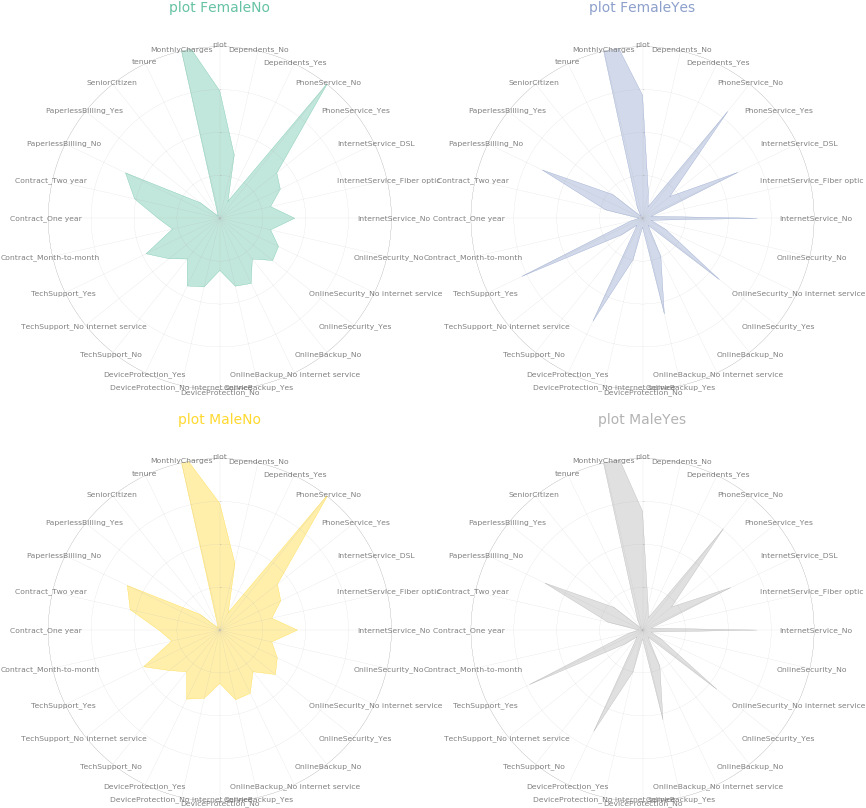

In [109]:
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=10
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(dfreset1.index))
 
# Loop to plot
for row in range(0, len(dfreset1.index)):
    make_spider( row=row, title='plot '+dfreset1['plot'][row], color=my_palette(row))


In [110]:
a1=a

In [111]:
from sklearn import preprocessing 
values1 = preprocessing.normalize(dfprofil)
a[['Dependents_No','Dependents_Yes','PhoneService_No','PhoneService_Yes','InternetService_DSL','InternetService_Fiber optic','InternetService_No','OnlineSecurity_No','OnlineSecurity_No internet service','OnlineSecurity_Yes', 'OnlineBackup_No','OnlineBackup_No internet service','OnlineBackup_Yes','DeviceProtection_No','DeviceProtection_No internet service','DeviceProtection_Yes','TechSupport_No','TechSupport_No internet service','TechSupport_Yes','Contract_Month-to-month','Contract_One year','Contract_Two year','PaperlessBilling_No','PaperlessBilling_Yes','SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]=values1

In [112]:
a*100

Dependents_No  Dependents_Yes  PhoneService_No  \
gender Churn                                                   
Female No         29.682592       15.105376         4.383728   
       Yes        28.709963        6.120341         2.967438   
Male   No         29.520532       15.851694         4.521631   
       Yes        27.696751        5.798670         3.241492   

              PhoneService_Yes  InternetService_DSL  \
gender Churn                                          
Female No            40.404240            16.989147   
       Yes           31.862866             8.123362   
Male   No            40.850595            17.185662   
       Yes           30.253928             8.643980   

              InternetService_Fiber optic  InternetService_No  \
gender Churn                                                    
Female No                       15.651141           12.147680   
       Yes                      24.629736            2.077207   
Male   No                       15.765073           12.421491   
       Yes                      22.798496            2.052945   

              OnlineSecurity_No  OnlineSecurity_No internet service  \
gender Churn                                                          
Female No             17.464491                           12.147680   
       Yes            26.744036                            2.077207   
Male   No             18.086523                           12.421491   
       Yes            26.652270                            2.052945   

              OnlineSecurity_Yes  ...  TechSupport_Yes  \
gender Churn                      ...                    
Female No              15.175797  ...        15.122981   
       Yes              6.009062  ...         6.120341   
Male   No              14.864211  ...        15.089427   
       Yes              4.790205  ...         5.222404   

              Contract_Month-to-month  Contract_One year  Contract_Two year  \
gender Churn                                                                  
Female No                   19.066576          11.320229          14.401163   
       Yes                  31.232286           2.781973           0.816045   
Male   No                   19.697679          11.485981          14.188565   
       Yes                  29.281481           3.277509           0.936431   

              PaperlessBilling_No  PaperlessBilling_Yes  SeniorCitizen  \
gender Churn                                                             
Female No               20.386976             24.400992       5.774549   
       Yes               8.902314             25.927990       8.902314   
Male   No               21.430104             23.942121       5.855598   
       Yes               8.247797             25.247624       8.499913   

                tenure  MonthlyCharges  TotalCharges  
gender Churn                                          
Female No     0.667826        1.085808     45.669193  
       Yes    0.630739        2.775003     53.450218  
Male   No     0.647493        1.055920     43.618013  
       Yes    0.682998        2.667640     58.472616  

[4 rows x 28 columns]